## Exercices 10 February 2021

In [1]:
# import networkx (and other useful packages)
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<mark> Remarque : les exercices à faire pour le 10 février sont plus bas dans le fichier après le sous-titre "Homework". Le haut du fichier correspond au TP effectué en classe. </mark>

**Description lawyers data Lazega**

This data set comes from a network study of a corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers. 

The ethnography, organizational and network analyses of this case are available in : Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001). Disponible en ligne: http://elazega.fr/wp-content/uploads/2012/10/Lazega-Collegial-Phenomenon-2001-Introduction.pdf

Coding

The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm. The attribute variables in the file ELattr.dat are:

    ID
    status (1=partner; 2=associate)
    gender (1=man; 2=woman)
    office (1=Boston; 2=Hartford; 3=Providence)
    years with the firm
    age
    practice (1=litigation; 2=corporate)
    law school (1: harvard, yale; 2: ucon; 3: other) 

# ELadvice 

Il s'agit des relations de "conseils" entre avocats (graphe asymmétrique). 

In [2]:
########### Graphs from empirical data ##############

# generate new digraph by reading edgelist (from empirical data)
# it is a "DiGraph" (not "Graph") because it is directed
# comments : à ne pas prendre en compte node car ce sont des commentaires
# nodetype = int car les identifants des noeuds sont des nombres entiers
ELadviceG = nx.read_edgelist('ELadvice_edgelist.txt',comments="node",
                             create_using=nx.DiGraph(),nodetype=int)

In [3]:
# match nodes of digraph with attributes of nodes
ELnodes = pd.read_table("ELnodeAttributes.txt", sep='\t')
ELnodes.head()

,Node,Status,Gender,Office,Senior,Age,Spec,School
0,1,1,1,1,31,64,1,1
1,2,1,1,1,32,62,2,1
2,3,1,1,2,13,67,1,1
3,4,1,1,1,31,59,2,3
4,5,1,1,2,31,59,1,2


In [4]:
ELNodeData = ELnodes.set_index('Node').to_dict('index').items()
list(ELNodeData)[0]

(1,
 {'Status': 1,
  'Gender': 1,
  'Office': 1,
  'Senior': 31,
  'Age': 64,
  'Spec': 1,
  'School': 1})

In [5]:
ELadviceG.add_nodes_from(ELNodeData)

# view fist results
print(list(ELadviceG.nodes(data=True))[0])
print(list(ELadviceG.edges(data=True))[0])

(1, {'Status': 1, 'Gender': 1, 'Office': 1, 'Senior': 31, 'Age': 64, 'Spec': 1, 'School': 1})
(1, 2, {})


In [6]:
# see basic properties of graph
print(nx.info(ELadviceG))

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 892
Average in degree:  12.5634
Average out degree:  12.5634


In [7]:
# to view attributes

# for example, 'Office'
offices = nx.get_node_attributes(ELadviceG,'Office')
print(offices)
# to view the value for a single node (for example, node n. 5)
offices[5]


{1: 1, 2: 1, 17: 1, 20: 1, 6: 2, 22: 1, 24: 1, 26: 1, 3: 2, 14: 2, 18: 2, 28: 2, 30: 2, 4: 1, 9: 1, 12: 1, 13: 1, 19: 1, 21: 1, 29: 1, 5: 2, 11: 1, 7: 2, 10: 1, 34: 1, 8: 1, 16: 1, 15: 3, 25: 2, 32: 2, 35: 2, 38: 1, 42: 1, 39: 1, 40: 1, 41: 1, 43: 1, 50: 2, 37: 3, 45: 1, 46: 2, 48: 1, 53: 1, 60: 1, 31: 2, 64: 1, 70: 1, 27: 1, 23: 1, 36: 1, 57: 1, 63: 2, 33: 2, 59: 2, 47: 3, 52: 1, 55: 1, 56: 1, 49: 1, 44: 3, 51: 2, 54: 1, 58: 2, 65: 1, 62: 1, 61: 1, 68: 1, 66: 1, 67: 1, 69: 1, 71: 1}


2

In [8]:
######################### Mini-digression ##############################

### A separate file with nodes (possibly with attributes)
### must be imported separately from the edge list, and 'added' to the graph
### if there are isolates (which do not appear in edgelists)

# For example, import friendship graph
ELfriendG = nx.read_edgelist('ELfriend_edgelist.txt',comments="node",
                             create_using=nx.DiGraph(),nodetype=int)
# see basic properties of this graph
print(nx.info(ELfriendG))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 575
Average in degree:   8.3333
Average out degree:   8.3333


In [9]:
# now add attributes (add nodes without links)
ELfriendG.add_nodes_from(ELNodeData)

# see basic properties of this graph again
print(nx.info(ELfriendG))

############### end of digression ##############

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 575
Average in degree:   8.0986
Average out degree:   8.0986


In [10]:
nx.density(ELadviceG)

0.179476861167002

In [11]:
nx.density(ELfriendG)

0.11569416498993963

In [12]:
################## Basic connectivity measures

# is the graph connected?
# Tout le réseau est-il connectée de manière directe ? 
print(nx.is_strongly_connected(ELadviceG)) # "strongly" because it is a digraph
# with an undirected graph, nx.is_connected(G)

# if "strongly" is false, try with "weakly":
print(nx.is_weakly_connected(ELadviceG))

False
True


In [13]:
### find isolates (components consisting in 1 node)
list(nx.isolates(ELadviceG))

[]

In [14]:
### find isolates in friendship network
list(nx.isolates(ELfriendG))

[44, 47]

In [15]:
# the networkx algorithm is only for undirected graphs
# so we need to take undirected representation
ELadviceUG = nx.DiGraph.to_undirected(ELadviceG)

In [16]:
## diameter

# because graph is not strongly connected (infinite distances)
# we need to take its undirected representation
# ELadviceUG = nx.DiGraph.to_undirected(ELadviceG)
print(nx.diameter(ELadviceUG))


3


Le diamètre est de 3, ce qui est relativement faible (graphe assez connecté).

In [17]:
### find cliques 
# cliques de tailes 1, 2, 3 et 7...
cliques = list(nx.find_cliques(ELadviceUG))
print("Nombre de cliques : ", len(cliques))
from statistics import mean
print("Longueur moyenne des cliques : ", mean([len(col) for col in cliques]))
print(cliques)

Nombre de cliques :  438
Longueur moyenne des cliques :  6.073059360730594
[[3, 2, 19, 4, 17], [3, 2, 19, 4, 6], [3, 28, 17, 19, 4], [3, 28, 17, 19, 30], [3, 28, 17, 14, 25, 30], [3, 28, 17, 14, 4], [3, 28, 6, 18], [3, 28, 6, 4, 19], [3, 28, 6, 4, 14], [3, 28, 6, 30, 19], [3, 28, 6, 30, 14], [3, 23, 18], [3, 23, 4], [7, 34, 16, 64, 2, 10], [7, 34, 16, 28], [7, 34, 33], [7, 35, 33], [7, 35, 28], [7, 58, 33], [7, 58, 28], [14, 48, 34, 16, 17, 42, 12], [14, 20, 17, 25, 30], [14, 20, 17, 42, 4], [14, 20, 17, 42, 30], [14, 20, 35, 25, 30], [14, 20, 35, 4], [14, 20, 35, 15], [14, 28, 12, 16, 32, 50], [14, 28, 12, 16, 32, 15], [14, 28, 12, 16, 25, 17], [14, 28, 12, 16, 25, 50], [14, 28, 12, 16, 42, 17, 34], [14, 28, 12, 16, 42, 17, 4], [14, 28, 12, 16, 42, 50], [14, 28, 12, 16, 15, 34], [14, 28, 12, 35, 32, 50], [14, 28, 12, 35, 32, 15], [14, 28, 12, 35, 25, 50], [14, 28, 12, 35, 4], [14, 28, 63, 35, 32, 50, 30], [14, 28, 63, 35, 32, 15], [14, 28, 63, 35, 25, 50, 30], [14, 28, 6, 32, 16, 50],

In [18]:
## average shortest path length
nx.average_shortest_path_length(ELadviceG)

2.061368209255533

Un peu plus faible que le diamètre mais reste relativement proche. Le graphe reste quand même assez bien connecté. 

**Rappel** : La notion de réciprocité s'applique uniquement pour les graphes orientés, c'est le cas ici.

In [19]:
##### Reciprocity (only interesting in digraph; not relevant in undirected graphs)
nx.reciprocity(ELadviceG)

0.3923766816143498

39 % des liens dans les relations de conseil sont réciproques. 

In [20]:
##### Transitivity
print(nx.transitivity(ELadviceG)) # this is the global clustering coefficient

0.36453095819566156


36 % de transitivité. 

In [21]:
# Clustering
print(nx.clustering(ELadviceG))  # measure is by node (local clustering coefficient)

{1: 0.37542087542087543, 2: 0.3752913752913753, 17: 0.3455399061032864, 20: 0.3694817658349328, 6: 0.3619047619047619, 22: 0.266156462585034, 24: 0.30824372759856633, 26: 0.2898071625344353, 3: 0.43564356435643564, 14: 0.4302600472813239, 18: 0.3888888888888889, 28: 0.2970639032815199, 30: 0.2919207317073171, 4: 0.3993558776167472, 9: 0.5223880597014925, 12: 0.36310299869621904, 13: 0.29012345679012347, 19: 0.31296296296296294, 21: 0.4055876685934489, 29: 0.4671361502347418, 5: 0.2727272727272727, 11: 0.37683823529411764, 7: 0.3181818181818182, 10: 0.43154761904761907, 34: 0.34456521739130436, 8: 0.4423076923076923, 16: 0.30102996254681647, 15: 0.3352803738317757, 25: 0.47315436241610737, 32: 0.38497652582159625, 35: 0.3599562363238512, 38: 0.39558232931726905, 42: 0.369727047146402, 39: 0.32346491228070173, 40: 0.390595009596929, 41: 0.3267937219730942, 43: 0.4188191881918819, 50: 0.3888888888888889, 37: 0.2619047619047619, 45: 0.41721854304635764, 46: 0.5086206896551724, 48: 0.379227

In [22]:
## take the average:
print(nx.average_clustering(ELadviceG)) 

0.3678383808693976


La moyenne du *local clustering coefficient* est ici presque identique à la transitivité globale

In [23]:
################# Centrality

# degree centrality (without considering directed edges)
# sur un graphe orienté il fait la somme des in et out. 
print(nx.degree_centrality(ELadviceG))

{1: 0.35714285714285715, 2: 0.42857142857142855, 17: 0.6714285714285714, 20: 0.4714285714285714, 6: 0.3, 22: 0.5, 24: 0.6857142857142857, 26: 0.8714285714285714, 3: 0.21428571428571427, 14: 0.42857142857142855, 18: 0.22857142857142856, 28: 0.7, 30: 0.5285714285714286, 4: 0.5142857142857142, 9: 0.24285714285714285, 12: 0.5714285714285714, 13: 0.7142857142857143, 19: 0.5857142857142857, 21: 0.4714285714285714, 29: 0.42857142857142855, 5: 0.3, 11: 0.34285714285714286, 7: 0.14285714285714285, 10: 0.2714285714285714, 34: 0.44285714285714284, 8: 0.21428571428571427, 16: 0.6714285714285714, 15: 0.42857142857142855, 25: 0.2571428571428571, 32: 0.42857142857142855, 35: 0.44285714285714284, 38: 0.32857142857142857, 42: 0.41428571428571426, 39: 0.44285714285714284, 40: 0.4714285714285714, 41: 0.6142857142857142, 43: 0.34285714285714286, 50: 0.3, 37: 0.09999999999999999, 45: 0.2571428571428571, 46: 0.22857142857142856, 48: 0.3, 53: 0.11428571428571428, 60: 0.2714285714285714, 31: 0.471428571428571

In [24]:
# indegree centrality (incoming ties)
print(nx.in_degree_centrality(ELadviceG))

{1: 0.3142857142857143, 2: 0.32857142857142857, 17: 0.37142857142857144, 20: 0.3142857142857143, 6: 0.3, 22: 0.32857142857142857, 24: 0.37142857142857144, 26: 0.5285714285714286, 3: 0.11428571428571428, 14: 0.22857142857142856, 18: 0.15714285714285714, 28: 0.3142857142857143, 30: 0.2857142857142857, 4: 0.2714285714285714, 9: 0.19999999999999998, 12: 0.2857142857142857, 13: 0.4857142857142857, 19: 0.15714285714285714, 21: 0.3142857142857143, 29: 0.24285714285714285, 5: 0.24285714285714285, 11: 0.2714285714285714, 7: 0.08571428571428572, 10: 0.17142857142857143, 34: 0.35714285714285715, 8: 0.18571428571428572, 16: 0.2857142857142857, 15: 0.2857142857142857, 25: 0.14285714285714285, 32: 0.2714285714285714, 35: 0.18571428571428572, 38: 0.24285714285714285, 42: 0.05714285714285714, 39: 0.24285714285714285, 40: 0.35714285714285715, 41: 0.3142857142857143, 43: 0.14285714285714285, 50: 0.15714285714285714, 37: 0.05714285714285714, 45: 0.11428571428571428, 46: 0.12857142857142856, 48: 0.0571428

In [25]:
# indegree centrality (outgoing ties)
print(nx.out_degree_centrality(ELadviceG))

{1: 0.04285714285714286, 2: 0.09999999999999999, 17: 0.3, 20: 0.15714285714285714, 6: 0.0, 22: 0.17142857142857143, 24: 0.3142857142857143, 26: 0.34285714285714286, 3: 0.09999999999999999, 14: 0.19999999999999998, 18: 0.07142857142857142, 28: 0.3857142857142857, 30: 0.24285714285714285, 4: 0.24285714285714285, 9: 0.04285714285714286, 12: 0.2857142857142857, 13: 0.22857142857142856, 19: 0.42857142857142855, 21: 0.15714285714285714, 29: 0.18571428571428572, 5: 0.05714285714285714, 11: 0.07142857142857142, 7: 0.05714285714285714, 10: 0.09999999999999999, 34: 0.08571428571428572, 8: 0.02857142857142857, 16: 0.3857142857142857, 15: 0.14285714285714285, 25: 0.11428571428571428, 32: 0.15714285714285714, 35: 0.2571428571428571, 38: 0.08571428571428572, 42: 0.35714285714285715, 39: 0.19999999999999998, 40: 0.11428571428571428, 41: 0.3, 43: 0.19999999999999998, 50: 0.14285714285714285, 37: 0.04285714285714286, 45: 0.14285714285714285, 46: 0.09999999999999999, 48: 0.24285714285714285, 53: 0.05714

In [26]:
# NON VU EN COURS
# Eigenvector centrality
nx.eigenvector_centrality(ELadviceG)

# This measure works only with undirected graphs.
# For directed graphs, networkx takes the “left” eigenvector centrality
# which corresponds to the in-edges in the graph.
# For out-edges eigenvector centrality first reverse the graph with G.reverse()
# (it is the transpose of the adjacency matrix)

{1: 0.23611842910389202,
 2: 0.23446598758776463,
 17: 0.2833381019863146,
 20: 0.2136997733197734,
 6: 0.19327488034675078,
 22: 0.14595178248289495,
 24: 0.2055602752981124,
 26: 0.27940181999328895,
 3: 0.0690957806884336,
 14: 0.16316090141330242,
 18: 0.04920764169567497,
 28: 0.17088364259117622,
 30: 0.12626722622054937,
 4: 0.18440063516941513,
 9: 0.1455021929173895,
 12: 0.20937508725597115,
 13: 0.1906295020615452,
 19: 0.10463771646723334,
 21: 0.16924653664919967,
 29: 0.1725461832837216,
 5: 0.10119522090334503,
 11: 0.16883332400304915,
 7: 0.03881236845877199,
 10: 0.08151403900398026,
 34: 0.20047568885772762,
 8: 0.12393409482289403,
 16: 0.1897905283487608,
 15: 0.17812634571760497,
 25: 0.0860128649495746,
 32: 0.1489807061393299,
 35: 0.094819273236335,
 38: 0.10060646340894579,
 42: 0.03394025636663496,
 39: 0.07694921955197542,
 40: 0.14459839998092092,
 41: 0.11514251781480742,
 43: 0.06431875795214105,
 50: 0.07329090846328304,
 37: 0.02526698595493389,
 45: 0.

Ce résultat sur l'*Eigenvector centrality* n'est pas à analyser car il n'a pas encore été étudié en cours

In [27]:
# NON VU EN COURS
# Closeness centrality
nx.closeness_centrality(ELadviceG)

# The closeness centrality uses inward distance to a node, not outward.
# If you want to use outword distances apply the function to G.reverse()

{1: 0.5763922518159806,
 2: 0.5863300492610838,
 17: 0.6018963337547408,
 20: 0.5763922518159806,
 6: 0.5691056910569106,
 22: 0.5813186813186814,
 24: 0.5813186813186814,
 26: 0.6603328710124827,
 3: 0.4304701627486438,
 14: 0.5075692963752666,
 18: 0.44165120593692025,
 28: 0.5667857142857142,
 30: 0.5272425249169435,
 4: 0.5529616724738676,
 9: 0.5075692963752666,
 12: 0.5621015348288075,
 13: 0.641644204851752,
 19: 0.482370820668693,
 21: 0.5574941451990633,
 29: 0.539795918367347,
 5: 0.5272425249169435,
 11: 0.5485023041474654,
 7: 0.4304701627486438,
 10: 0.4858163265306123,
 34: 0.5863300492610838,
 8: 0.5038095238095238,
 16: 0.5667857142857142,
 15: 0.5621015348288075,
 25: 0.4564717162032598,
 32: 0.5529616724738676,
 35: 0.45955598455598456,
 38: 0.5231868131868133,
 42: 0.40972461273666094,
 39: 0.5313616071428572,
 40: 0.5441142857142858,
 41: 0.5191930207197383,
 43: 0.45342857142857146,
 50: 0.489311408016444,
 37: 0.3931461601981834,
 45: 0.4658512720156556,
 46: 0.45

Ce résultat sur la *Closeness centrality* n'est pas à analyser car il n'a pas encore été étudié en cours

In [28]:
# Betweenness centrality
nx.betweenness_centrality(ELadviceG)

# Betweenness values are normalized by 2/((n-1)(n-2)) for graphs,
# and 1/((n-1)(n-2)) for directed graphs, where n is the number of nodes 

{1: 0.008833673173946111,
 2: 0.01009224654146655,
 17: 0.07855679481717165,
 20: 0.01139731429167709,
 6: 0.0,
 22: 0.025115281617500766,
 24: 0.05165160763525819,
 26: 0.06642682993590107,
 3: 0.004973753454634258,
 14: 0.01234010299412268,
 18: 0.005471541688690605,
 28: 0.06171447676778272,
 30: 0.07491023142150818,
 4: 0.013384164027975378,
 9: 0.0006494578186122967,
 12: 0.03889449310210418,
 13: 0.04394039301097058,
 19: 0.0341594801550794,
 21: 0.012734656353257365,
 29: 0.007984875916370418,
 5: 0.004435473932021742,
 11: 0.016778388440100718,
 7: 0.001329623311926803,
 10: 0.004740117693952743,
 34: 0.007839694186268205,
 8: 0.00020918292657423092,
 16: 0.0799836790470071,
 15: 0.014440526789132104,
 25: 0.003180226613076882,
 32: 0.01953798851844105,
 35: 0.01574651961242209,
 38: 0.003339991474684802,
 42: 0.011272989345195553,
 39: 0.07320791418995971,
 40: 0.009241482257118577,
 41: 0.0495274725774742,
 43: 0.009961798414741208,
 50: 0.009435751588984723,
 37: 0.014474282

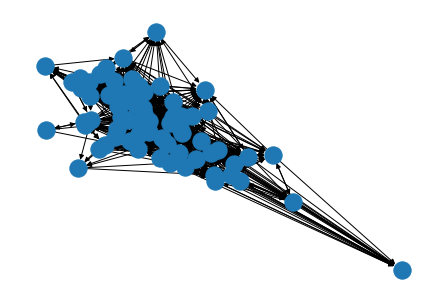

In [29]:
# NON VU EN COURS JUSQU'A LA PARTIE HOMEWORK
#### Let us look at visualization

# draw graph
nx.draw(ELadviceG)
plt.show()

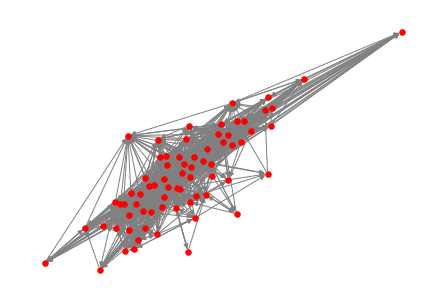

In [30]:
# improve visualization

# change layout, eg Fruchterman Reingold
# reduce node size, make edges more transparent to improve visibility
nx.draw(ELadviceG, with_labels=False, node_size=30, node_color="red", edge_color = "gray",
        pos=nx.fruchterman_reingold_layout(ELadviceG))

Position nodes using Fruchterman-Reingold force-directed algorithm.

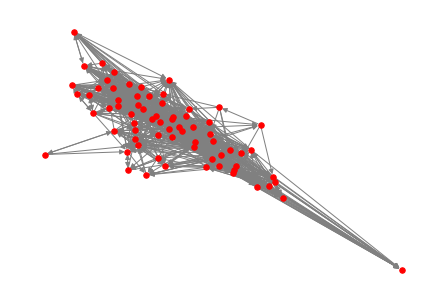

In [31]:
#spring_layout 
nx.draw(ELadviceG, with_labels=False, node_size=30, node_color="red", edge_color = "gray",
        pos=nx.spring_layout(ELadviceG))

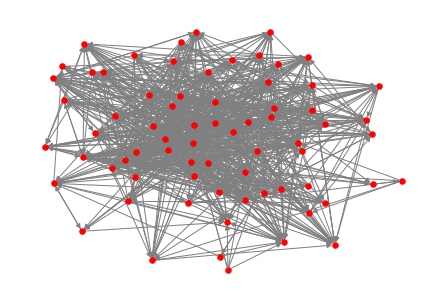

In [32]:
# spring layout with more spaces between nodes
nx.draw(ELadviceG, with_labels=False, node_size=30, node_color="red", edge_color = "gray",
        pos= nx.spring_layout(ELadviceG, k=0.8, iterations=20))
plt.show()

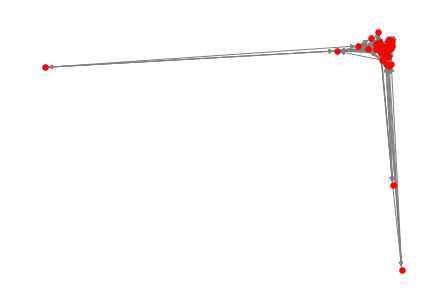

In [33]:
#spectral_layout
nx.draw(ELadviceG, with_labels=False, node_size=30, node_color="red", edge_color = "gray",
        pos=nx.spectral_layout(ELadviceG))

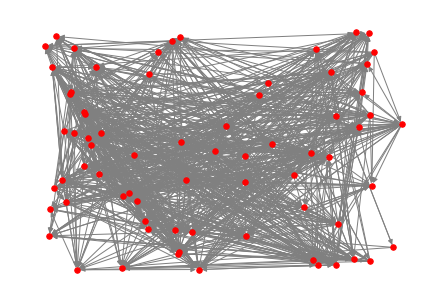

In [34]:
#random_layout
nx.draw(ELadviceG, with_labels=False, node_size=30, node_color="red", edge_color = "gray",
        pos=nx.random_layout(ELadviceG))

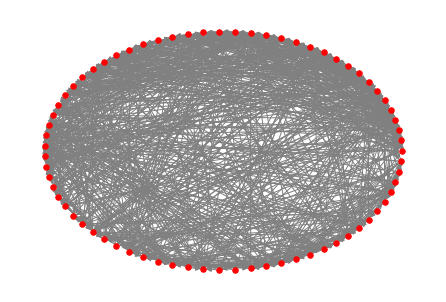

In [35]:
#circular_layout
nx.draw(ELadviceG, with_labels=False, node_size=30, node_color="red", edge_color = "gray",
        pos=nx.circular_layout(ELadviceG))

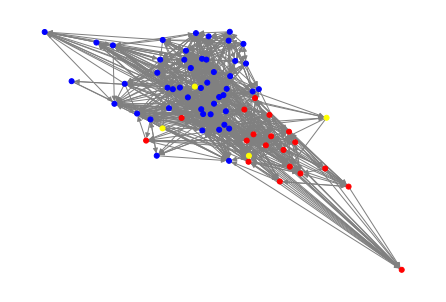

In [36]:
### use different colors to represent attributes, eg Office
# Office has 3 values only (categorical variable)

# create empty list for node colors
node_color = []

# for each node in the graph
for node in ELadviceG.nodes(data=True):

    # if the node has the attribute Office 1
    if node[1]['Office']==1:
        node_color.append('blue')
        
    # if the node has the attribute Office 2
    elif node[1]['Office']==2:
        node_color.append('red')

    # if the node has the attribute office 3
    elif node[1]['Office']==3:
        node_color.append('yellow')

    # draw graph with node attribute color
nx.draw(ELadviceG, with_labels=False, node_size=25, node_color=node_color, edge_color = "gray",
        pos = nx.spring_layout(ELadviceG, seed=1)) #NEW : seed

**Remarque** : Nous ajoutons le paramètre `seed` pour toujours obtenir la même forme de graphe. 

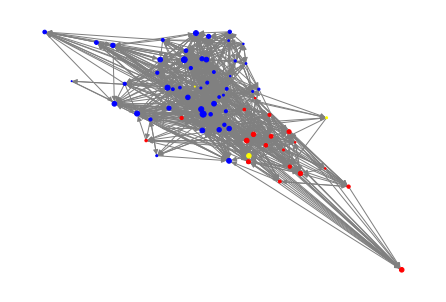

In [37]:
# change node size to reflect indegree

indeg = ELadviceG.in_degree   # sets up the indegree view
indegs = [d for n, d in indeg]   # gets all nodes' degree values

# draw plot (color = office)
nx.draw(ELadviceG, pos=nx.fruchterman_reingold_layout(ELadviceG, seed=1), with_labels=False,
        node_color=node_color, edge_color = "gray",
        node_size=indegs)
plt.show()

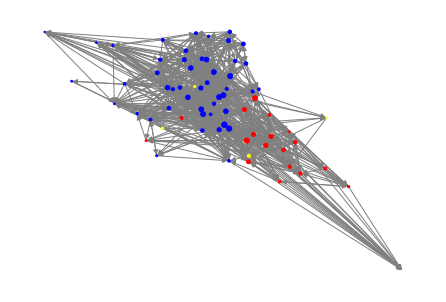

In [38]:
# Exercise: do the same for outdegree

# change node size to reflect outdegree

outdeg = ELadviceG.out_degree   # sets up the outdegree view
outdegs = [d for n, d in outdeg]   # gets all nodes' degree values

# draw plot (color = office)
nx.draw(ELadviceG, pos=nx.fruchterman_reingold_layout(ELadviceG, seed = 1), with_labels=False,
        node_color=node_color, edge_color = "gray", 
        node_size=outdegs)
plt.show()

In [39]:
###### For better visualization
## export graph in Gephi format
#nx.write_gexf(ELadviceG, 'ELadviceG.gexf')

<mark> Début des devoirs à faire pour le 10/20 </mark>

## Homework for next time 

Re-do the same with ELfriend and ELcowork: create graph objects, add attributes, analyze

Careful: ELfriend is an asymmetric matrix (like ELadvice) while ELcowork is symmetric

Also: mind the presence of isolates

Email to paola.tubaro@lri.fr by Tuesday, 23 February 2021, 2pm

# ELfriend


Il s'agit des relations d' "amitié" entre avocats (graphe asymmétrique). 

In [40]:
########### Graphs from empirical data ##############

# generate new digraph by reading edgelist (from empirical data)
# it is a "DiGraph" (not "Graph") because it is directed
# comments : à ne pas prendre en compte node car ce sont des commentaires
# nodetype = int car les identifants des noeuds sont des nombres entiers
ELfriendG = nx.read_edgelist('ELfriend_edgelist.txt',comments="node",
                             create_using=nx.DiGraph(),nodetype=int)

In [41]:
# see basic properties of graph
print(nx.info(ELfriendG))

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 575
Average in degree:   8.3333
Average out degree:   8.3333


Les degrés moyens sont inférieurs à ceux de ELadviceG, ce qui signifie qu'il existe moins de liens entre noeuds que dans la base précédente. 

In [42]:
#list(ELNodeData)
ELfriendG.add_nodes_from(ELNodeData)

# view fist results
print(list(ELfriendG.nodes(data=True))[0])
print(list(ELfriendG.edges(data=True))[0])

(1, {'Status': 1, 'Gender': 1, 'Office': 1, 'Senior': 31, 'Age': 64, 'Spec': 1, 'School': 1})
(1, 2, {})


In [43]:
# see basic properties of graph
print(nx.info(ELfriendG))

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 575
Average in degree:   8.0986
Average out degree:   8.0986


Il y a désormais 71 noeuds au lieu de 69 car le fait d'ajouter les attributs a ajouté 2 noeuds isolés. Parfois, il sera judicieux de les enlever pour certaines analyses. 

In [44]:
# to view attributes

# for example, 'Office'
offices = nx.get_node_attributes(ELfriendG,'Office')
print(offices)
# to view the value for a single node (for example, node n. 5)
offices[5]


{1: 1, 2: 1, 4: 1, 8: 1, 17: 1, 16: 1, 22: 1, 26: 1, 3: 2, 9: 1, 11: 1, 12: 1, 14: 2, 19: 1, 21: 1, 23: 1, 27: 1, 29: 1, 5: 2, 7: 2, 18: 2, 25: 2, 24: 1, 10: 1, 13: 1, 34: 1, 38: 1, 15: 3, 20: 1, 41: 1, 43: 1, 52: 1, 6: 2, 28: 2, 50: 2, 37: 3, 32: 2, 39: 1, 40: 1, 31: 2, 33: 2, 35: 2, 51: 2, 58: 2, 46: 2, 60: 1, 36: 1, 57: 1, 30: 2, 42: 1, 54: 1, 56: 1, 48: 1, 49: 1, 64: 1, 45: 1, 55: 1, 65: 1, 62: 1, 59: 2, 53: 1, 61: 1, 63: 2, 66: 1, 69: 1, 70: 1, 71: 1, 68: 1, 67: 1, 44: 3, 47: 3}


2

## Cohesion (density)

In [45]:
print("Densité graphe orienté :",nx.density(ELfriendG))

ELfriendUG = nx.DiGraph.to_undirected(ELfriendG)

print("Densité graphe non orienté :",nx.density(ELfriendUG))

Densité graphe orienté : 0.11569416498993963
Densité graphe non orienté : 0.16056338028169015


**Rappel** : Il s'agit du ratio du nombre de liens qui existent sur ceux qui pourraient exister. Elle est élevée pour un réseau dense et est faible pour un réseau peu dense (ou *sparse*, typiquement un réseau social). 

$$Density=\begin{cases}
\frac{L}{n(n-1)} & \text{ unoriented graphes} \\
\frac{L}{\frac{(n-1)}{2}} & \text{ oriented graphes} 
\end{cases}
$$

La densité du graphe orienté est de 0,11. Elle est inférieure à celle du graphe ELadviceG car les liens y sont bien moins nombreux (575 ici). La densité du graphe non orienté permettra d'être comparé au réseau *ELcowork* dans la partie qui suit. 

## Basic connectivity measures

In [46]:
### find isolates (components consisting in 1 node)
list(nx.isolates(ELfriendG))

[44, 47]

Il existe deux noeuds isolés : les noeuds 44 et 47. Ils apparaissent en vert dans le graphe ci-dessous. 

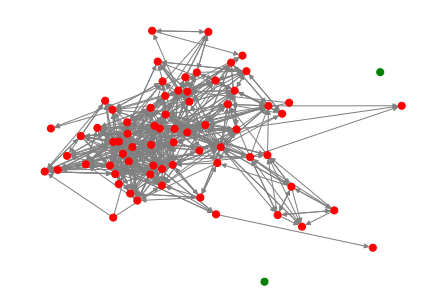

In [47]:
#### Let us look at visualization

# isolated nodes in green, the rest in red.
def creer_vect_couleur(G, noeuds_colores):
    node_color = []
    for node in list(G.nodes()):
        if node in noeuds_colores :
            node_color.append('green')
        else:
            node_color.append('red')
    return node_color

node_color = creer_vect_couleur(ELfriendG, list(nx.isolates(ELfriendG)))

# change layout, reduce node size, make edges more transparent to improve visibility
nx.draw(ELfriendG, with_labels=False, node_size=50, node_color=node_color, edge_color = "gray",
        #fix seed to always obtain the same graphe
        pos= nx.spring_layout(ELfriendG, k=0.3, iterations=20, seed=1))
plt.show()

In [48]:
# is the graph connected?
print(nx.is_strongly_connected(ELfriendG)) # "strongly" because it is a digraph
# with an undirected graph, nx.is_connected(G)

# if "strongly" is false, try with "weakly":
print(nx.is_weakly_connected(ELfriendG))

False
False


**Rappel** : Un *walk* (chemin en français) est une séquence de sommets qui se suivent en suivant les arêtes. Un *path* (une chaîne en français), est un *walk* pour lequel chaque noeud n'apparaît qu'une fois. Ainsi, un *path* est en particulier un *walk*.

- Comme précédemment, le graphe **n'est pas connecté de manière directe**. C'est à dire qu'il n'existe pas de *walk* (ni de *path* du coup) entre tous les noeuds en suivant la direction des liens. 
- En revanche, il **n'est pas non plus connecté de manière faible**, contrairement à ELadvice, cela signifique qu'il n'existe pas non plus de `walk` entre tous les noeuds, même indépendamment de la direction des liens. 

Toutefois, le graphe ne peut pas être connecté (de manière faible ou forte) en raison de la présence de noeuds isolés.  
Nous créons donc un objet pour le graphique sans noeud isolé pour étudier s'il est connecté si on met de côté ses noeuds isolés. 

In [49]:
ELfriendG_notisolated = ELfriendG.copy()
ELfriendG_notisolated.remove_nodes_from(list(nx.isolates(ELfriendG_notisolated)))
print(nx.info(ELfriendG_notisolated),"\n")

Name: 
Type: DiGraph
Number of nodes: 69
Number of edges: 575
Average in degree:   8.3333
Average out degree:   8.3333 



In [50]:
# is the graph connected?
print(nx.is_strongly_connected(ELfriendG_notisolated)) # "strongly" because it is a digraph
# with an undirected graph, nx.is_connected(G)

# if "strongly" is false, try with "weakly":
print(nx.is_weakly_connected(ELfriendG_notisolated))

False
True


Le graphe sans noeud isolé est, cette fois ci, **connecté de manière faible**, comme ELadviceG. 

In [51]:
## diameter
# because graph is not strongly connected (infinite distances)
# we need to take its undirected representation
#print(nx.diameter(ELfriendUG))
def calculer_diametre(G):
    if nx.is_directed(G):
        if not nx.is_weakly_connected(G):
            print("Calcul du diamètre impossible car le graphe n'est pas connecté.")
        else:
            UG = nx.DiGraph.to_undirected(G)
            print("Diamètre :",nx.diameter(UG))   
    else:
        if not nx.is_connected(G):
            print("Calcul du diamètre impossible car le graphe n'est pas connecté.")
        else:
            UG = G.copy()   
            print("Diamètre :",nx.diameter(UG))

In [52]:
calculer_diametre(ELfriendG)

Calcul du diamètre impossible car le graphe n'est pas connecté.


**Rappel**  : Le diamètre correspond à la distance la plus grande possible qui puisse exister entre deux sommets, la distance entre deux sommets étant définie comme le plus court chemin entre deux sommets. 

Ici, cela renvoie une erreur car le graphe n'est pas connecté. Il faut donc le calculer sur le graphe pour lequel on enlève les noeuds isolés. 

In [53]:
calculer_diametre(ELfriendG_notisolated)

Diamètre : 5


Le diamètre est de 5, ce qui est plus fort que précédemment. Il faut parcourir une longue distance pour relier les noeuds les plus éloignés, le graphe semble moins (et peu) connecté. 

In [54]:
## average shortest path length
def calculer_shortest_path_length(G):
    if nx.is_directed(G):
        if not nx.is_weakly_connected(G):
            print("Calcul du chemin le plus court impossible car le graphe n'est pas connecté.")
        else:
            UG = nx.DiGraph.to_undirected(G)
            print("Longueur du chemin le plus court :",nx.average_shortest_path_length(UG))   
    else:
        if not nx.is_connected(G):
             print("Calcul du chemin le plus court impossible car le graphe n'est pas connecté.")
        else:
            UG = G.copy()   
            print("Longueur du chemin le plus court :",nx.average_shortest_path_length(UG))

In [55]:
calculer_shortest_path_length(ELfriendG)

Calcul du chemin le plus court impossible car le graphe n'est pas connecté.


**Rappel** : La longueur moyenne du chemin le plus court (*average path length*, A.P.L.) correspond à la distance moyenne entre toutes les paires de noeuds. C'est une mesure moins sensible aux *outliers* que le diamètre. Si les chemins sont courts, l'information dans le réseau met peu de temps à circuler. 

Ici, cela renvoie une erreur car le graphe n'est pas connecté. Il faut donc à nouveau le calculer sur le graphe pour lequel on enlève les noeuds isolés. 

In [56]:
calculer_shortest_path_length(ELfriendG_notisolated)

Longueur du chemin le plus court : 2.1862745098039214


La longueur du chemin le plus court (2.18) est un peu plus élevée que *ELadviceG*, ce qui signifie que que les relations sont plus indirectes. Il faut plus de liens pour mettre en relations deux noeuds. Cela confirme l'intuition du diamètre comme quoi le graphe est moins connecté que *ELadviceG*.

Ici, l'APL est beaucoup plus faible que le diamètre. Cela signifie peut-être qu'il y a des outliers dans le graphe qui influent beaucoup sur la longueur du diamètre. 

In [57]:
### find cliques 
# cliques de tailles 1, 2, 3 et 7...
cliques = list(nx.find_cliques(ELfriendUG))
#cliques
print("Nombre de cliques : ", len(cliques))
from statistics import mean
print("Longueur moyenne des cliques : ", mean([len(col) for col in cliques]))

Nombre de cliques :  154
Longueur moyenne des cliques :  4.720779220779221


**Rappel** : Un *clique* est un sous-ensemble de noeuds où toutes les paires de noeuds sont directement connectées.  Les cliques permettent de capturer des différences de cohésion entre différentes parties du réseau. 

*ELFriendG* comporte 154 cliques, les réseaux complets sont donc moins nombreux que précédemment (moins de sous-ensemble connectés). Ils sont d'une taille moyenne légèrement plus faible que précédemment (4,7 individus), ce qui suppose l'existence de sous-graphe complets de plus petites tailles. 

## Local structures

In [58]:
##### Reciprocity (only interesting in digraph; not relevant in undirected graphs)
nx.reciprocity(ELfriendG)

0.6121739130434782

**Rappel** : Reciprocity = $\frac{N\text{ reciprocated ties}}{N\text{ ties}}$.
La notion de réciprocité s'applique uniquement pour les graphes orientés, c'est bien le cas ici.

61 % des liens dans les relations d'amitié sont réciproques. La réciprocité est beaucoup plus grande que les relations de conseil. 

In [59]:
##### Transitivity
print(nx.transitivity(ELfriendG)) # this is the global clustering coefficient

0.3473431401981387


**Rappel** : La *transitivity* est le rapport entre le nombre de triades transitives et le nombre de triades possiblement transitives : 
 $$ \text{transitivity }= \frac{N \text{ transitive triads}}{N \text{ potentially transitive triads}}
$$
La transitivité est forte quand les gens sont reliés entre eux par des intermédiaires, comme selon l'adage "les amis de mes amis sont mes amis". 

Ici, la part de transitivité des liens d'amitié est de 35 %, bien plus faible que la réciprocité. Il y a donc relativement peu de triades transitives dans le réseau d'amitié, une proportion équivalente aux relations de conseil. 

In [60]:
# Clustering
print(nx.clustering(ELfriendG))  # measure is by node (local clustering coefficient)

{1: 0.6142857142857143, 2: 0.5229885057471264, 4: 0.37468671679197996, 8: 0.37037037037037035, 17: 0.31218905472636815, 16: 0.2533783783783784, 22: 0.5625, 26: 0.38100436681222705, 3: 0.25, 9: 0.5978260869565217, 11: 0.5301204819277109, 12: 0.3548009367681499, 14: 0.29069767441860467, 19: 0.28846153846153844, 21: 0.536734693877551, 23: 0.7037037037037037, 27: 0.4858490566037736, 29: 0.40710382513661203, 5: 0.17307692307692307, 7: 0.2, 18: 0.47093023255813954, 25: 0.3602941176470588, 24: 0.3542483660130719, 10: 0.5503355704697986, 13: 0.34392014519056263, 34: 0.29770992366412213, 38: 0.3235294117647059, 15: 0.38461538461538464, 20: 0.45481927710843373, 41: 0.3110831234256927, 43: 0.3220108695652174, 52: 0.444636678200692, 6: 0, 28: 0.40594059405940597, 50: 0.504424778761062, 37: 0, 32: 0.5098039215686274, 39: 0.2867647058823529, 40: 0.38513513513513514, 31: 0.22916666666666666, 33: 0.30097087378640774, 35: 0.37575757575757573, 51: 0.6506849315068494, 58: 0.4013840830449827, 46: 0.384615

In [61]:
## take the average:
print(nx.average_clustering(ELfriendG)) 

0.3952045322118626


**Rappel** : Le coefficient de groupement local (*local clustering coefficient*) mesure la cohésion dans le voisinage d'un noeud (combien de ses amis sont amis entre eux). Pour chaque noeud $i$,
$$
CI_i=\frac{\text{number existing ties between i's friends}}{\text{number possible ties between i's friends}}
$$

On fait ici sa moyenne. 

La moyenne du *local clustering coefficient* est de 40 %. C'est assez proche de la transitivité globale et de sa valeur pour les relations de conseil. 

## Centrality

In [62]:
# degree centrality (without considering directed edges)
# sur un graphe orienté il fait la somme des in et out ?
centra_degree = nx.degree_centrality(ELfriendG)
dict(sorted(centra_degree.items(), key=lambda item: item[1], reverse=True))

{17: 0.5857142857142857,
 24: 0.5714285714285714,
 31: 0.5714285714285714,
 13: 0.4857142857142857,
 64: 0.4857142857142857,
 26: 0.44285714285714284,
 12: 0.42857142857142855,
 27: 0.42857142857142855,
 65: 0.42857142857142855,
 4: 0.41428571428571426,
 41: 0.41428571428571426,
 43: 0.39999999999999997,
 52: 0.35714285714285715,
 58: 0.35714285714285715,
 42: 0.34285714285714286,
 21: 0.32857142857142857,
 25: 0.3,
 38: 0.3,
 28: 0.3,
 39: 0.3,
 57: 0.3,
 9: 0.2857142857142857,
 29: 0.2857142857142857,
 36: 0.2857142857142857,
 11: 0.2714285714285714,
 20: 0.2714285714285714,
 35: 0.2714285714285714,
 66: 0.2714285714285714,
 16: 0.2571428571428571,
 10: 0.2571428571428571,
 40: 0.2571428571428571,
 54: 0.2571428571428571,
 56: 0.2571428571428571,
 34: 0.24285714285714285,
 50: 0.22857142857142856,
 33: 0.21428571428571427,
 2: 0.19999999999999998,
 22: 0.19999999999999998,
 14: 0.19999999999999998,
 18: 0.19999999999999998,
 51: 0.18571428571428572,
 60: 0.17142857142857143,
 70: 0.1

**Rappel** La centralité de degrés montrent qui sont les noeuds les plus actifs, qui ont le plus de connexions. Ils jouent un rôle de connecteur, de *hub*.

C'est l'individu **17** qui est le plus central. Il est en effet respectivement troisième et deuxième en centralité de degré entrant et sortant (cf. ci-dessous). Il possède en effet 25 voisins. 

Nombre de voisins de  17  :  25


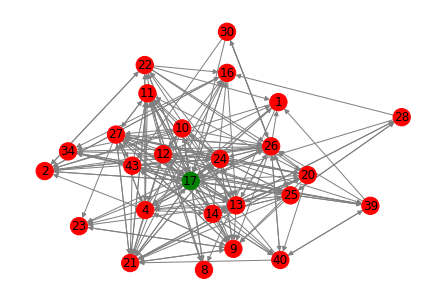

In [63]:
# Zoom on 17 in green and its neighbours
ind = 17
ELfriendG_zoom = nx.ego_graph(ELfriendG, ind, radius=1, center=True, undirected=True, distance=None)
# undirected ne veut pas dire que le graphe n'est pas orienté, mais qu'on cherche les voisins in et out
node_color = creer_vect_couleur(ELfriendG_zoom, [ind])
print("Nombre de voisins de ", ind," : ", len(node_color)-1)
nx.draw(ELfriendG_zoom ,
        #fix seed to always obtain same graph
        pos = nx.spring_layout(ELfriendG_zoom, k=0.9, iterations=20, seed=1), 
        node_size=300, with_labels=True, 
        node_color=node_color, edge_color = "gray")
plt.show()


In [64]:
# indegree centrality (incoming ties)
centra_indegree = nx.in_degree_centrality(ELfriendG)
dict(sorted(centra_indegree.items(), key=lambda item: item[1], reverse=True))

{26: 0.3142857142857143,
 13: 0.2857142857142857,
 17: 0.2571428571428571,
 27: 0.24285714285714285,
 24: 0.24285714285714285,
 41: 0.24285714285714285,
 21: 0.21428571428571427,
 31: 0.21428571428571427,
 64: 0.21428571428571427,
 4: 0.19999999999999998,
 9: 0.19999999999999998,
 11: 0.19999999999999998,
 52: 0.19999999999999998,
 38: 0.18571428571428572,
 43: 0.18571428571428572,
 39: 0.18571428571428572,
 58: 0.17142857142857143,
 57: 0.17142857142857143,
 34: 0.15714285714285714,
 36: 0.15714285714285714,
 54: 0.15714285714285714,
 2: 0.14285714285714285,
 16: 0.14285714285714285,
 29: 0.14285714285714285,
 25: 0.14285714285714285,
 35: 0.14285714285714285,
 56: 0.14285714285714285,
 28: 0.12857142857142856,
 42: 0.12857142857142856,
 12: 0.11428571428571428,
 50: 0.11428571428571428,
 40: 0.11428571428571428,
 60: 0.11428571428571428,
 65: 0.11428571428571428,
 8: 0.09999999999999999,
 23: 0.09999999999999999,
 20: 0.09999999999999999,
 32: 0.09999999999999999,
 51: 0.099999999999

C'est l'individu **26** qui est le plus central en termes de degré entrant. Il possède en effet 22 voisins en termes de noeuds entrants.  

Nombre de voisins entrants de  26  :  22


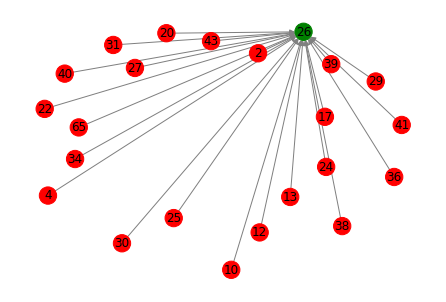

In [65]:
# Zoom on 26 in green and its in-neighbours
ind = 26
ELfriendG_zoom = nx.ego_graph(ELfriendG, ind, radius=1, center=True, undirected=True, distance=None)
# undirected ne veut pas dire que le graphe n'est pas orienté, mais qu'on cherche les voisins in et out
# Filter Edges
predecessors = list(ELfriendG_zoom.predecessors(ind))
ELfriendG_zoom = ELfriendG.subgraph([ind] + predecessors)
selected_edges = [(u,v) for u,v in ELfriendG_zoom.edges() if (v == ind) ]
ELfriendG_zoom = ELfriendG_zoom.edge_subgraph(selected_edges)

node_color = creer_vect_couleur(ELfriendG_zoom, [ind])
print("Nombre de voisins entrants de ", ind," : ", len(node_color)-1)
nx.draw(ELfriendG_zoom ,
        pos = nx.spring_layout(ELfriendG_zoom, k=0.9, iterations=20, seed=1),
        node_size=300, with_labels=True, 
        node_color=node_color, edge_color = "gray")
plt.show()

In [66]:
# outdegree centrality (outgoing ties)
centra_outdegree = nx.out_degree_centrality(ELfriendG)
dict(sorted(centra_outdegree.items(), key=lambda item: item[1], reverse=True))

{31: 0.35714285714285715,
 17: 0.32857142857142857,
 24: 0.32857142857142857,
 12: 0.3142857142857143,
 65: 0.3142857142857143,
 64: 0.2714285714285714,
 66: 0.22857142857142856,
 4: 0.21428571428571427,
 43: 0.21428571428571427,
 42: 0.21428571428571427,
 10: 0.19999999999999998,
 13: 0.19999999999999998,
 27: 0.18571428571428572,
 58: 0.18571428571428572,
 20: 0.17142857142857143,
 41: 0.17142857142857143,
 28: 0.17142857142857143,
 33: 0.17142857142857143,
 25: 0.15714285714285714,
 52: 0.15714285714285714,
 29: 0.14285714285714285,
 40: 0.14285714285714285,
 26: 0.12857142857142856,
 18: 0.12857142857142856,
 35: 0.12857142857142856,
 36: 0.12857142857142856,
 57: 0.12857142857142856,
 16: 0.11428571428571428,
 22: 0.11428571428571428,
 14: 0.11428571428571428,
 21: 0.11428571428571428,
 38: 0.11428571428571428,
 50: 0.11428571428571428,
 39: 0.11428571428571428,
 56: 0.11428571428571428,
 54: 0.09999999999999999,
 48: 0.09999999999999999,
 70: 0.09999999999999999,
 9: 0.0857142857

C'est l'individu **31** qui est le plus central en termes de degré sotant. Il possède en effet 25 voisins en termes de noeuds sortants.  

Nombre de voisins sortants de  31  :  25


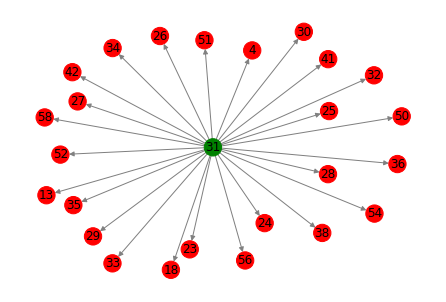

In [67]:
# Zoom on 31 in green and its out-neighbours
ind = 31
ELfriendG_zoom = nx.ego_graph(ELfriendG, ind, radius=1, center=True, undirected=True, distance=None)
# undirected ne veut pas dire que le graphe n'est pas orienté, mais qu'on cherche les voisins in et out
# Filter Edges
successors = list(ELfriendG_zoom.successors(ind))
ELfriendG_zoom = ELfriendG.subgraph([ind] + successors)
selected_edges = [(u,v) for u,v in ELfriendG_zoom.edges() if (u == ind) ]
ELfriendG_zoom = ELfriendG_zoom.edge_subgraph(selected_edges)

node_color = creer_vect_couleur(ELfriendG_zoom, [ind])
print("Nombre de voisins sortants de ", ind," : ", len(node_color)-1)
nx.draw(ELfriendG_zoom ,
        pos = nx.spring_layout(ELfriendG_zoom, k=0.9, iterations=20, seed=1),
        node_size=300, with_labels=True, 
        node_color=node_color, edge_color = "gray")
plt.show()

In [68]:
# Betweenness centrality ordered (descending importance of betweenness)
betweenness = nx.betweenness_centrality(ELfriendG)
dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))

# Betweenness values are normalized by 2/((n-1)(n-2)) for graphs,
# and 1/((n-1)(n-2)) for directed graphs, where n is the number of nodes 

{64: 0.1350706934847035,
 31: 0.10402816057237814,
 17: 0.0795351404407706,
 24: 0.07592215150043266,
 41: 0.05271140827002394,
 43: 0.05271126980330362,
 13: 0.046470678886771116,
 65: 0.04621712773817919,
 58: 0.043036551862949725,
 4: 0.037707918954494844,
 12: 0.035740633202756666,
 42: 0.03323062703317348,
 57: 0.030164822187451583,
 52: 0.029742196786879012,
 25: 0.028587572881816656,
 16: 0.02549422128419246,
 66: 0.02500642086558265,
 39: 0.02282938102865828,
 5: 0.022451106047364337,
 18: 0.022202154575013375,
 35: 0.02092498040187692,
 28: 0.019784636240453325,
 60: 0.018716205329584238,
 14: 0.018136887718441116,
 26: 0.01773136833647559,
 27: 0.01705916779898783,
 34: 0.015840269669585242,
 9: 0.015690242536270656,
 11: 0.015528823282891131,
 38: 0.015108049131679513,
 29: 0.014852712866296964,
 15: 0.013457556935817806,
 20: 0.013394503341933331,
 36: 0.012776992525210773,
 21: 0.012739599968008813,
 33: 0.011781799864652403,
 70: 0.011602615410249765,
 19: 0.0110115805907

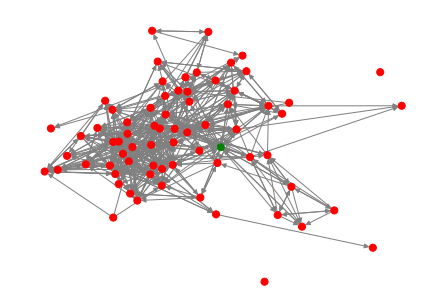

In [69]:
# Observation du noeud 64 dans le graphe
ind = 64
node_color = creer_vect_couleur(ELfriendG, [ind])
nx.draw(ELfriendG, with_labels=False, node_size=50, node_color=node_color, edge_color = "gray"
        ,pos= nx.spring_layout(ELfriendG, k=0.3, iterations=20, seed=1)
       )
plt.show()

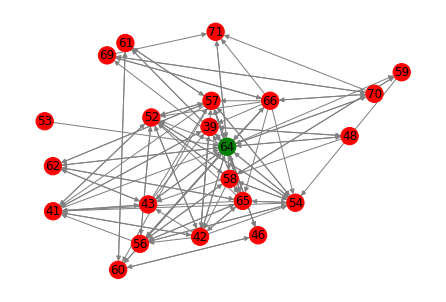

In [70]:
# Zoom on 64 in green and its neighbours
ind = 64
ELfriendG_zoom = nx.ego_graph(ELfriendG, ind, radius=1, center=True, undirected=True, distance=None)
# undirected ne veut pas dire que le graphe n'est pas orienté, mais qu'on cherche les voisins in et out
node_color = creer_vect_couleur(ELfriendG_zoom, [ind])
nx.draw(ELfriendG_zoom ,
        pos = nx.spring_layout(ELfriendG_zoom, k=0.9, iterations=20, seed=1),
        node_size=300, with_labels=True, 
        node_color=node_color, edge_color = "gray")
plt.show()

**Rappel** : la centralité de *betweeness* permet d'identifier les individus qui jouent le rôle de "ponts" au sein du network. Cela peut être une information d'importance de l'individu au sein du réseau car il permet de l'étendre.

On voit que l'individu 64 (représenté en vert dans les deux graphiques précédents) est l'individu dont la centralité de *betweenness* est la plus forte. 

**Remarque** : Les centralités qui suivent n'ont pas encore été étudiées en cours, nous ne les avons donc pas compilées et commentées, dans ce rendu, si besoin il suffira de décommenter les lignes ci-dessous. 

In [71]:
# CENTRALITES NON VU EN COURS

# Eigenvector centrality
#nx.eigenvector_centrality(ELfriendG)

# This measure works only with undirected graphs.
# For directed graphs, networkx takes the “left” eigenvector centrality
# which corresponds to the in-edges in the graph.
# For out-edges eigenvector centrality first reverse the graph with G.reverse()
# (it is the transpose of the adjacency matrix)

# Closeness centrality
#nx.closeness_centrality(ELfriendG)

# The closeness centrality uses inward distance to a node, not outward.
# If you want to use outword distances apply the function to G.reverse()

## Ajouter des attributs dans la représentation des graphes 

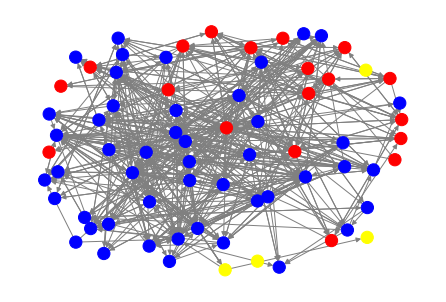

In [72]:
### use different colors to represent attributes, eg Office
# Office has 3 values only (categorical variable)

# create empty list for node colors
node_color = []

# for each node in the graph
for node in ELfriendG.nodes(data=True):

    # if the node has the attribute Office 1
    if node[1]['Office']==1:
        node_color.append('blue')
        
    # if the node has the attribute Office 2
    elif node[1]['Office']==2:
        node_color.append('red')

    # if the node has the attribute office 3
    elif node[1]['Office']==3:
        node_color.append('yellow')

    # draw graph with node attribute color
nx.draw(ELfriendG, with_labels=False, node_size=150, node_color=node_color, edge_color = "gray",
        pos = nx.spring_layout(ELfriendG, k=0.9, iterations=20, seed=1)) #NEW : seed

**Remarque** : Nous ajoutons le paramètre `seed` pour toujours obtenir la même forme de graphe. 

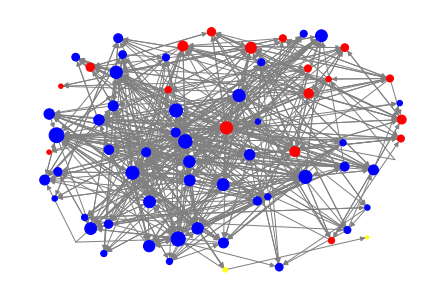

In [73]:
# change node size to reflect indegree

indeg = ELfriendG.in_degree   # sets up the indegree view
indegs = [10 *d for n, d in indeg]   # gets all nodes' degree values

# draw plot (color = office)
nx.draw(ELfriendG, pos=nx.spring_layout(ELfriendG, k=0.9, iterations=20, seed=1), with_labels=False,
        node_color=node_color, edge_color = "gray",
        node_size=indegs)
plt.show()

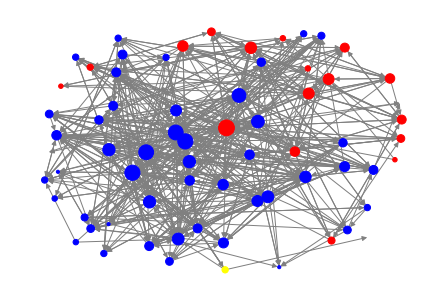

In [74]:
# Exercise: do the same for outdegree

# change node size to reflect outdegree

outdeg = ELfriendG.out_degree   # sets up the outdegree view
outdegs = [10 *d for n, d in outdeg]   # gets all nodes' degree values

# draw plot (color = office)
nx.draw(ELfriendG, pos=nx.spring_layout(ELfriendG, k=0.9, iterations=20, seed=1), with_labels=False,
        node_color=node_color, edge_color = "gray", 
        node_size=outdegs)
plt.show()

In [75]:
###### For better visualization
## export graph in Gephi format
#nx.write_gexf(ELfriendG, 'ELfriendG.gexf')

# ELcowork


Il s'agit des relations d' "travail collaboratif" entre avocats (graphe symmétrique). 

In [76]:
########### Graphs from empirical data ##############

# generate new digraph by reading edgelist (from empirical data)
# it is a "DiGraph" (not "Graph") because it is directed
# comments : à ne pas prendre en compte node car ce sont des commentaires
# nodetype = int car les identifants des noeuds sont des nombres entiers
ELcoworkUG = nx.read_edgelist('ELcowork_edgelist.txt',comments="node",
                             create_using=nx.Graph(),nodetype=int)

In [77]:
# see basic properties of graph
print(nx.info(ELcoworkUG))

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 378
Average degree:  10.8000


Les liens entre noeuds sont plus faibles que dans les graphes précédents. C'est logique car c'est un graphe non orienté donc d'une toute autre nature.

In [78]:
#list(ELNodeData)
ELcoworkUG.add_nodes_from(ELNodeData)

# view fist results
print(list(ELcoworkUG.nodes(data=True))[0])
print(list(ELcoworkUG.edges(data=True))[0])

(1, {'Status': 1, 'Gender': 1, 'Office': 1, 'Senior': 31, 'Age': 64, 'Spec': 1, 'School': 1})
(1, 17, {})


In [79]:
# see basic properties of graph
print(nx.info(ELcoworkUG))

Name: 
Type: Graph
Number of nodes: 71
Number of edges: 378
Average degree:  10.6479


Il y a désormais 71 noeuds au lieu de 70 car le fait d'ajouter les attributs a ajouté 1 noeuds isolé. Parfois, il sera judicieux de l'enlever pour certaines analyses. 

In [80]:
# to view attributes

# for example, 'Office'
offices = nx.get_node_attributes(ELcoworkUG,'Office')
print(offices)
# to view the value for a single node (for example, node n. 5)
offices[5]


{1: 1, 17: 1, 39: 1, 40: 1, 41: 1, 2: 1, 7: 2, 16: 1, 22: 1, 26: 1, 29: 1, 44: 3, 53: 1, 62: 1, 64: 1, 3: 2, 18: 2, 25: 2, 28: 2, 4: 1, 12: 1, 19: 1, 20: 1, 31: 2, 37: 3, 45: 1, 46: 2, 52: 1, 61: 1, 70: 1, 5: 2, 24: 1, 32: 2, 33: 2, 38: 1, 50: 2, 51: 2, 54: 1, 58: 2, 59: 2, 63: 2, 6: 2, 30: 2, 43: 1, 65: 1, 9: 1, 60: 1, 10: 1, 34: 1, 49: 1, 11: 1, 56: 1, 15: 3, 42: 1, 13: 1, 55: 1, 57: 1, 66: 1, 67: 1, 71: 1, 14: 2, 35: 2, 36: 1, 47: 3, 48: 1, 27: 1, 68: 1, 21: 1, 69: 1, 23: 1, 8: 1}


2

## Cohesion (density)

In [81]:
print("Densité graphe non orienté :",nx.density(ELcoworkUG))

Densité graphe non orienté : 0.15211267605633802


**Rappel** : Il s'agit du ratio du nombre de liens qui existent sur ceux qui pourraient exister. Elle est élevée pour un réseau dense et est faible pour un réseau peu dense (ou *sparse*, typiquement un réseau social). 

$$Density=\begin{cases}
\frac{L}{n(n-1)} & \text{ unoriented graphes} \\
\frac{L}{\frac{(n-1)}{2}} & \text{ oriented graphes} 
\end{cases}
$$

La densité du graphe (non orienté) est de 0,15. Elle est inférieure à celle du graphe ELfriendUG (quand on le considère non orienté). 

## Basic connectivity measures

In [82]:
### find isolates (components consisting in 1 node)
list(nx.isolates(ELcoworkUG))

[8]

Il existe un noeud isolé : le noeud 8. Il apparait en vert dans le graphe ci-dessous. C'est pourquoi le graphe ne peut pas être connecté. 

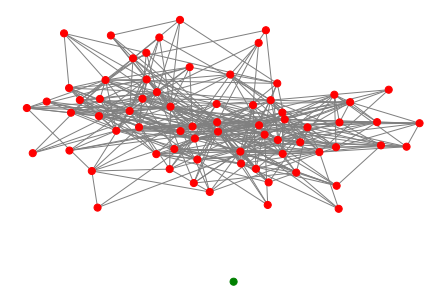

In [83]:
#### Let us look at visualization
node_color = creer_vect_couleur(ELcoworkUG, list(nx.isolates(ELcoworkUG)))

# change layout, reduce node size, make edges more transparent to improve visibility
nx.draw(ELcoworkUG, with_labels=False, node_size=50, node_color=node_color, edge_color = "gray",
        #fix seed to always obtain the same graphe
        pos= nx.spring_layout(ELcoworkUG, k=0.3, iterations=20, seed=1))
plt.show()

In [84]:
# is the graph connected?
print(nx.is_connected(ELcoworkUG)) # "connected" because it is a graph
# with an directed graph, nx.is_strongly_connected(G) and nx.is_weekly_connected(G)

False


**Rappel** : Un *walk* (chemin en français) est une séquence de sommets qui se suivent en suivant les arêtes. Un *path* (une chaîne en français), est un *walk* pour lequel chaque noeud n'apparaît qu'une fois. Ainsi, un *path* est en particulier un *walk*.

- Comme précédemment, le graphe **n'est pas connecté**. C'est à dire qu'il n'existe pas de *walk* (ni de *path* du coup) entre tous les noeuds.

Toutefois, le graphe ne peut pas être connecté en raison de la présence d'un noeud isolé.  
Nous créons donc un objet pour le graphique sans noeud isolé pour étudier s'il est connecté si on met de côté son noeud isolé.

In [85]:
ELcoworkUG_notisolated = ELcoworkUG.copy()
ELcoworkUG_notisolated.remove_nodes_from(list(nx.isolates(ELcoworkUG_notisolated)))
print(nx.info(ELcoworkUG_notisolated),"\n")

Name: 
Type: Graph
Number of nodes: 70
Number of edges: 378
Average degree:  10.8000 



In [86]:
# is the graph connected?
print(nx.is_connected(ELcoworkUG_notisolated)) # "connected" because it is a graph
# with an directed graph, nx.is_strongly_connected(G) and nx.is_weekly_connected(G)

True


Le graphe sans noeud isolé est, cette fois ci, **connecté**, comme ELadviceG et ELfriendG. 

In [87]:
calculer_diametre(ELcoworkUG)

Calcul du diamètre impossible car le graphe n'est pas connecté.


**Rappel**  : Le diamètre correspond à la distance la plus grande possible qui puisse exister entre deux sommets, la distance entre deux sommets étant définie comme le plus court chemin entre deux sommets. 

Ici, cela renvoie une erreur car le graphe n'est pas connecté. Il faut donc le calculer sur le graphe pour lequel on enlève les noeuds isolés. 

In [88]:
calculer_diametre(ELcoworkUG_notisolated)

Diamètre : 4


Le diamètre est de 4, ce qui est plus faible que pour les liens d'amitié. Il faut parcourir une plus petite distance pour relier les noeuds les plus éloignés, le graphe des liens de travail collaboratif semble plus connecté que celui des liens d'amitié. 

In [89]:
calculer_shortest_path_length(ELcoworkUG)

Calcul du chemin le plus court impossible car le graphe n'est pas connecté.


**Rappel** : La longueur moyenne du chemin le plus court (*average path length*, A.P.L.) correspond à la distance moyenne entre toutes les paires de noeuds. C'est une mesure moins sensible aux *outliers* que le diamètre. Si les chemins sont courts, l'information dans le réseau met peu de temps à circuler. 

Ici, cela renvoie une erreur car le graphe n'est pas connecté. Il faut donc à nouveau le calculer sur le graphe pour lequel on enlève les noeuds isolés. 

In [90]:
calculer_shortest_path_length(ELcoworkUG_notisolated)

Longueur du chemin le plus court : 2.10351966873706


La longueur du chemin le plus court (2.10) est un peu plus faible que *ELfriendG*, ce qui signifie que que les relations sont plus directes. Il faut moins de liens pour mettre en relations deux noeuds. Cela confirme l'intuition du diamètre comme quoi le graphe est plus connecté que *ELfriendG*.

Ici, l'APL est de nouveau plus faible que le diamètre. Cela signifie peut-être qu'il y a des outliers dans le graphe qui influent beaucoup sur la longueur du diamètre. 

In [91]:
### find cliques 
# cliques de tailles 1, 2, 3 et 7...
cliques = list(nx.find_cliques(ELcoworkUG))
#cliques
print("Nombre de cliques : ", len(cliques))
from statistics import mean
print("Longueur moyenne des cliques : ", mean([len(col) for col in cliques]))

Nombre de cliques :  205
Longueur moyenne des cliques :  3.5853658536585367


**Rappel** : Un *clique* est un sous-ensemble de noeuds où toutes les paires de noeuds sont directement connectées.  Les cliques permettent de capturer des différences de cohésion entre différentes parties du réseau. 

*ELcoworkUG* comporte 205 cliques, les réseaux complets sont donc plus nombreux que pour *ELFriendG* (plus de sous-ensemble connectés). Ils sont en revanche d'une taille moyenne légèrement plus faible que précédemment (3,6 individus), ce qui suppose l'existence de sous-graphe complets de plus petites tailles. 

## Local structures

**Rappel** : La notion de réciprocité ne s'applique pas pour les graphes non-orientés.

In [92]:
##### Transitivity
print(nx.transitivity(ELcoworkUG)) # this is the global clustering coefficient

0.3069738480697385


**Rappel** : La *transitivity* est le rapport entre le nombre de triades transitives et le nombre de triades possiblement transitives : 
 $$ \text{transitivity }= \frac{N \text{ transitive triads}}{N \text{ potentially transitive triads}}
$$
La transitivité est forte quand les gens sont reliés entre eux par des intermédiaires, comme selon l'adage "les amis de mes amis sont mes amis". 

Ici, la part de transitivité des liens d'amitié est de 31 %. Il y a donc encore moins de triades transitives dans le réseau de travail en collaboration que pour les réseaux précédents. 

In [93]:
# Clustering
print(nx.clustering(ELcoworkUG))  # measure is by node (local clustering coefficient)

{1: 0.16666666666666666, 17: 0.2813852813852814, 39: 0.18181818181818182, 40: 0.1794871794871795, 41: 0.3, 2: 0.37777777777777777, 7: 0.3333333333333333, 16: 0.23, 22: 0.13227513227513227, 26: 0.2022792022792023, 29: 0.2867647058823529, 44: 0.6, 53: 0.4, 62: 0.6444444444444445, 64: 0.7, 3: 0.6666666666666666, 18: 0.46153846153846156, 25: 0.39285714285714285, 28: 0.3157894736842105, 4: 0.3235294117647059, 12: 0.48717948717948717, 19: 0.2631578947368421, 20: 0.7, 31: 0.32748538011695905, 37: 0.6666666666666666, 45: 0.37777777777777777, 46: 0.5833333333333334, 52: 0.3333333333333333, 61: 0.5277777777777778, 70: 0.39285714285714285, 5: 0.38461538461538464, 24: 0.20915032679738563, 32: 0.35947712418300654, 33: 0.5, 38: 0.3333333333333333, 50: 0.5714285714285714, 51: 0.5777777777777777, 54: 0.23636363636363636, 58: 0.6666666666666666, 59: 0.7142857142857143, 63: 0.3939393939393939, 6: 0.3484848484848485, 30: 0.3611111111111111, 43: 0.14285714285714285, 65: 0.41818181818181815, 9: 0.5, 60: 0.

In [94]:
## take the average:
print(nx.average_clustering(ELcoworkUG)) 

0.3852689534189992


**Rappel** : Le coefficient de groupement local (*local clustering coefficient*) mesure la cohésion dans le voisinage d'un noeud (combien de ses amis sont amis entre eux). Pour chaque noeud $i$,
$$
CI_i=\frac{\text{number existing ties between i's friends}}{\text{number possible ties between i's friends}}
$$

On fait ici sa moyenne. 

La moyenne du *local clustering coefficient* est de 39 %. C'est supérieur à la transitivité globale, mais sa valeur est assez proche de celle des deux autres réseaux. 

## Centrality

In [95]:
# degree centrality (without considering directed edges)
# sur un graphe orienté il fait la somme des in et out. 
centra_degree = nx.degree_centrality(ELcoworkUG)
dict(sorted(centra_degree.items(), key=lambda item: item[1], reverse=True))

{22: 0.39999999999999997,
 26: 0.3857142857142857,
 16: 0.35714285714285715,
 17: 0.3142857142857143,
 28: 0.2857142857142857,
 19: 0.2857142857142857,
 31: 0.2714285714285714,
 15: 0.2714285714285714,
 24: 0.2571428571428571,
 32: 0.2571428571428571,
 29: 0.24285714285714285,
 4: 0.24285714285714285,
 41: 0.22857142857142856,
 13: 0.21428571428571427,
 5: 0.19999999999999998,
 43: 0.19999999999999998,
 40: 0.18571428571428572,
 18: 0.18571428571428572,
 12: 0.18571428571428572,
 38: 0.18571428571428572,
 55: 0.18571428571428572,
 63: 0.17142857142857143,
 6: 0.17142857142857143,
 49: 0.17142857142857143,
 39: 0.15714285714285714,
 54: 0.15714285714285714,
 65: 0.15714285714285714,
 11: 0.15714285714285714,
 35: 0.15714285714285714,
 27: 0.15714285714285714,
 2: 0.14285714285714285,
 62: 0.14285714285714285,
 45: 0.14285714285714285,
 51: 0.14285714285714285,
 58: 0.14285714285714285,
 46: 0.12857142857142856,
 61: 0.12857142857142856,
 33: 0.12857142857142856,
 30: 0.12857142857142856

**Rappel** La centralité de degrés montrent qui sont les noeuds les plus actifs, qui ont le plus de connexions. Ils jouent un rôle de connecteur, de *hub*.

C'est l'individu **22** qui est le plus central.Il possède en effet 28 voisins. 

Les centralités en termes de liens entrants et sortants n'ont pas de sens ici (graphe non orienté).

Nombre de voisins de  22  :  28


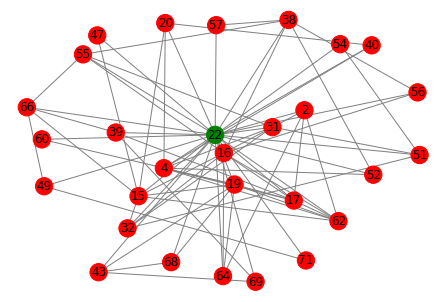

In [96]:
# Zoom on 22 in green and its neighbours
ind = 22
ELcoworkUG_zoom = nx.ego_graph(ELcoworkUG, ind, radius=1, center=True, undirected=True, distance=None)
node_color = creer_vect_couleur(ELcoworkUG_zoom, [ind])
print("Nombre de voisins de ", ind," : ", len(node_color)-1)
nx.draw(ELcoworkUG_zoom ,
        #fix seed to always obtain same graph
        pos = nx.spring_layout(ELcoworkUG_zoom, k=0.9, iterations=20, seed=1), 
        node_size=300, with_labels=True, 
        node_color=node_color, edge_color = "gray")
plt.show()


In [97]:
# Betweenness centrality ordered (descending importance of betweenness)
betweenness = nx.betweenness_centrality(ELcoworkUG)
betweenness
dict(sorted(betweenness.items(), key=lambda item: item[1], reverse=True))

# Betweenness values are normalized by 2/((n-1)(n-2)) for graphs,
# and 1/((n-1)(n-2)) for directed graphs, where n is the number of nodes 

{22: 0.12000594038865765,
 16: 0.09138288267694478,
 26: 0.08090256302007151,
 17: 0.061577351037316146,
 28: 0.053062649684693305,
 31: 0.04739475552871514,
 19: 0.04526051295148355,
 15: 0.045135153433056685,
 32: 0.04217655609747202,
 24: 0.037201636622717534,
 4: 0.032113817950944056,
 43: 0.02777222448540032,
 29: 0.02431896151974383,
 13: 0.020231786310239558,
 2: 0.019282456056536394,
 40: 0.01881024557203285,
 41: 0.018414767175011424,
 39: 0.018028074881947975,
 5: 0.017968021789046898,
 54: 0.017146489586533392,
 55: 0.016867015239219046,
 63: 0.016210487388344037,
 6: 0.016000849153020767,
 18: 0.015347351568223444,
 38: 0.015217385095103689,
 11: 0.012624940146787614,
 10: 0.011552934906436671,
 49: 0.011309527891807161,
 45: 0.010194555781550345,
 35: 0.009749778225996722,
 36: 0.009080775162017133,
 27: 0.008957685633215012,
 12: 0.008172369037328332,
 57: 0.0075602242179839295,
 30: 0.007408737387821789,
 33: 0.006406531407273213,
 25: 0.0062132212276334396,
 65: 0.00598

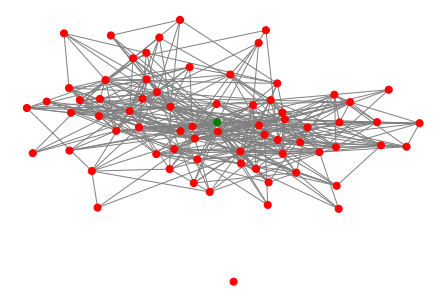

In [98]:
# Observation du noeud 64 dans le graphe
ind = 22
node_color = creer_vect_couleur(ELcoworkUG, [ind])
nx.draw(ELcoworkUG, with_labels=False, node_size=50, node_color=node_color, edge_color = "gray"
        ,pos= nx.spring_layout(ELcoworkUG, k=0.3, iterations=20, seed=1)
       )
plt.show()

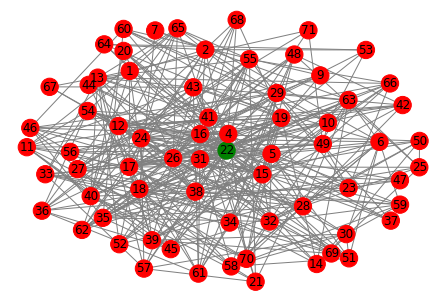

In [99]:
# Zoom on 22 in green and its neighbours and neighbours of neighbours
ind = 22
ELcoworkUG_zoom = nx.ego_graph(ELcoworkUG, ind, radius=2, center=True, undirected=True, distance=None)
# undirected ne veut pas dire que le graphe n'est pas orienté, mais qu'on cherche les voisins in et out
node_color = creer_vect_couleur(ELcoworkUG_zoom, [ind])
nx.draw(ELcoworkUG_zoom ,
        pos = nx.spring_layout(ELcoworkUG_zoom, k=0.9, iterations=20, seed=1),
        node_size=300, with_labels=True, 
        node_color=node_color, edge_color = "gray")
plt.show()

**Rappel** : la centralité de *betweeness* permet d'identifier les individus qui jouent le rôle de "ponts" au sein du network. Cela peut être une information d'importance de l'individu au sein du réseau car il permet de l'étendre.

On voit que l'individu 22 (représenté en vert dans les deux graphiques précédents) est l'individu dont la centralité de *betweenness* est la plus forte. 

**Remarque** : Les centralités qui suivent n'ont pas encore été étudiées en cours, nous ne les avons donc pas compilées et commentées, dans ce rendu, si besoin il suffira de décommenter les lignes ci-dessous. 

In [100]:
# CENTRALITES NON VU EN COURS

# Eigenvector centrality
#nx.eigenvector_centrality(ELcoworkUG)

# This measure works only with undirected graphs.
# For directed graphs, networkx takes the “left” eigenvector centrality
# which corresponds to the in-edges in the graph.
# For out-edges eigenvector centrality first reverse the graph with G.reverse()
# (it is the transpose of the adjacency matrix)

# Closeness centrality
#nx.closeness_centrality(ELcoworkUG)

# The closeness centrality uses inward distance to a node, not outward.
# If you want to use outword distances apply the function to G.reverse()

## Ajouter des attributs dans la représentation des graphes 

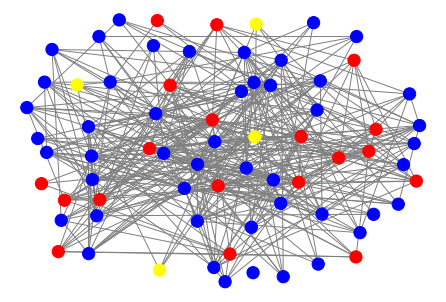

In [101]:
### use different colors to represent attributes, eg Office
# Office has 3 values only (categorical variable)

# create empty list for node colors
node_color = []

# for each node in the graph
for node in ELcoworkUG.nodes(data=True):

    # if the node has the attribute Office 1
    if node[1]['Office']==1:
        node_color.append('blue')
        
    # if the node has the attribute Office 2
    elif node[1]['Office']==2:
        node_color.append('red')

    # if the node has the attribute office 3
    elif node[1]['Office']==3:
        node_color.append('yellow')

    # draw graph with node attribute color
nx.draw(ELcoworkUG, with_labels=False, node_size=150, node_color=node_color, edge_color = "gray",
        pos = nx.spring_layout(ELcoworkUG, k=0.9, iterations=20, seed=1)) #NEW : seed

**Remarque** : Nous ajoutons le paramètre `seed` pour toujours obtenir la même forme de graphe. 

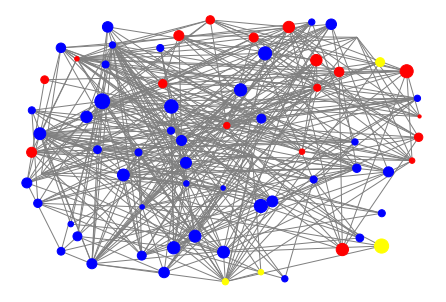

In [102]:
# change node size to reflect degree

deg = ELcoworkUG.degree   # sets up the indegree view
degs = [10 *d for n, d in indeg]   # gets all nodes' degree values

# draw plot (color = office)
nx.draw(ELcoworkUG, pos=nx.spring_layout(ELfriendG, k=0.9, iterations=20, seed=1), with_labels=False,
        node_color=node_color, edge_color = "gray",
        node_size=degs)
plt.show()

In [103]:
###### For better visualization
## export graph in Gephi format
#nx.write_gexf(ELcoworkUG, 'ELcoworkUG.gexf')

**Bilan**

*ELadvice*

- Densité : orienté 0,17
- Diamètre : 3 
- Average shortest path : 2,06 
- Cliques : 438 cliques et 6,07 de taille moyenne
- Réciprocité : 39 %
- Transitivité : 36 %
- Average clustering : 36 %

*ELfriend*

- Densité : orienté 0,11 (non orienté : 0,16)
- Diamètre : 5 
- Average shortest path : 2,18 
- Cliques : 154 cliques et 4,7 de taille moyenne
- Réciprocité : 61 %
- Transitivité : 35 %
- Average clustering : 39 %

*ELcowork*

- Densité : orienté sans objet. non orienté : 0,15.
- Diamètre : 4
- Average shortest path : 2,10
- Cliques : 205 cliques et 3,6 de taille moyenne
- Réciprocité : n'a pas de sens (graphe non orienté)
- Transitivité : 31 %
- Average clustering : 39 %
